<center><h1> - Tabular Playground Series - Sep 2022 - </h1></center>
<b>Goal</b>: Predicting book sales during the year 2021 for 4 items from two competing stores located in six different countries.

### ⬇ Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Folders

In [2]:
PROJECT_DIR = os.path.join(".", "..")
DATASET_DIR = os.path.join(PROJECT_DIR, "dataset")

### 1. Basic exploration
* <b>Train dataset Columns</b>:
    * row_id: Incrementing row of dataset.
    * date (timestamp): The day on which the book stores are opened beginning from 2017-01-01 up to 2020-12-31. 
    Note that the stores neither close on weekends nor during holidays.
    * country (str): The 6 different countries - Belgium, France, Germany, Italy, Poland & Spain
    * store (str): The 2 competing store names - KaggleMart & KaggleRama
    * product (str): The 4 different book names
    * num_sold (int): Target value - Number of sales for given date.

In [3]:
train_df = pd.read_csv(os.path.join(DATASET_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(DATASET_DIR, "test.csv"))

In [4]:
train_df.head(10)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
5,5,2017-01-01,Belgium,KaggleRama,Kaggle Getting Started,187
6,6,2017-01-01,Belgium,KaggleRama,Kaggle Recipe Book,158
7,7,2017-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,267
8,8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610
9,9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463


In [5]:
test_df.head()

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [6]:
train_df.shape

(70128, 6)

In [7]:
test_df.shape

(17520, 5)

##### Unique values per column

In [8]:
print("Train data: ")
print(f"Date column unique entries: {len(train_df.date.unique())} from {train_df.date.unique()[0]} to {train_df.date.unique()[-1]}")
print(f"Country column unique entries: {len(train_df.country.unique())}  - {train_df.country.unique()} ")
print(f"Store column unique entries: {len(train_df.store.unique())} - {train_df.store.unique()} ")
print(f"Product column unique entries: {len(train_df['product'].unique())} - {train_df['product'].unique()}")
print()
print("Test data: ")
print(f"Date column unique entries: {len(test_df.date.unique())} from {test_df.date.unique()[0]} to {test_df.date.unique()[-1]}")
print(f"Country column unique entries: {len(test_df.country.unique())}  - {test_df.country.unique()} ")
print(f"Store column unique entries: {len(test_df.store.unique())} - {test_df.store.unique()} ")
print(f"Product column unique entries: {len(test_df['product'].unique())} - {test_df['product'].unique()}")

Train data: 
Date column unique entries: 1461 from 2017-01-01 to 2020-12-31
Country column unique entries: 6  - ['Belgium' 'France' 'Germany' 'Italy' 'Poland' 'Spain'] 
Store column unique entries: 2 - ['KaggleMart' 'KaggleRama'] 
Product column unique entries: 4 - ['Kaggle Advanced Techniques' 'Kaggle Getting Started'
 'Kaggle Recipe Book' 'Kaggle for Kids: One Smart Goose']

Test data: 
Date column unique entries: 365 from 2021-01-01 to 2021-12-31
Country column unique entries: 6  - ['Belgium' 'France' 'Germany' 'Italy' 'Poland' 'Spain'] 
Store column unique entries: 2 - ['KaggleMart' 'KaggleRama'] 
Product column unique entries: 4 - ['Kaggle Advanced Techniques' 'Kaggle Getting Started'
 'Kaggle Recipe Book' 'Kaggle for Kids: One Smart Goose']


##### Time intervall between datapoints

In [32]:
print(f"First date: {train_df.date.unique()[0]}, second date: {train_df.date.unique()[1]}")
print(f"First date: {train_df.date.unique()[0]}, 7th date: {train_df.date.unique()[7]}")
print(f"N-1'th date: {train_df.date.unique()[-2]}, N'th date: {train_df.date.unique()[-1]}")

First date: 2017-01-01, second date: 2017-01-02
First date: 2017-01-01, 7th date: 2017-01-08
N-1'th date: 2020-12-30, N'th date: 2020-12-31


##### Occurance of features

<AxesSubplot:title={'center':'Occurance in test df'}, xlabel='Product'>

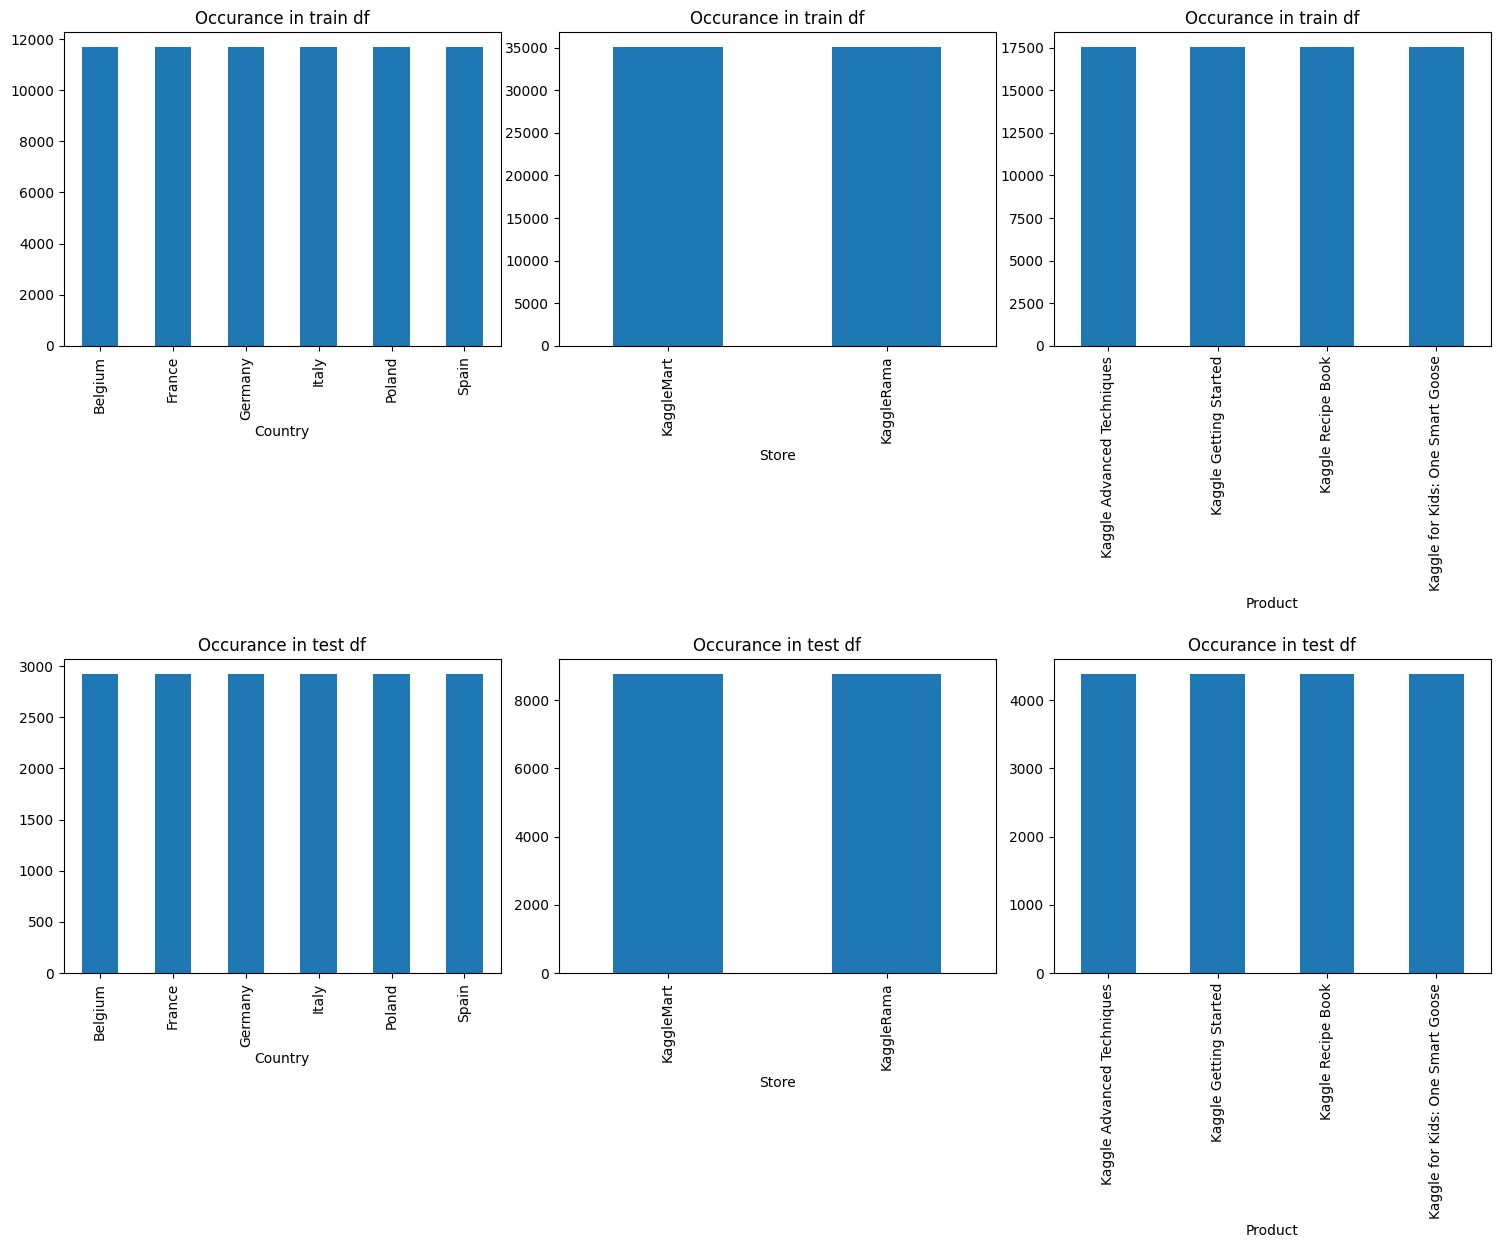

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.tight_layout()
plt.subplots_adjust(hspace=1)
# -> Train dataset
# Plot country occurances
axes[0][0].set_title('Occurance in train df')
axes[0][0].set_xlabel('Country')
train_df.country.value_counts().plot(ax=axes[0][0], kind = 'bar')
# Plot store occurances
axes[0][1].set_title('Occurance in train df')
axes[0][1].set_xlabel('Store')
train_df.store.value_counts().plot(ax=axes[0][1], kind = 'bar')
# Plot product occurances
axes[0][2].set_title('Occurance in train df')
axes[0][2].set_xlabel('Product')
train_df['product'].value_counts().plot(ax=axes[0][2], kind = 'bar')
# -> Test dataset
# Plot country occurances
axes[1][0].set_title('Occurance in test df')
axes[1][0].set_xlabel('Country')
test_df.country.value_counts().plot(ax=axes[1][0], kind = 'bar')
# Plot store occurances
axes[1][1].set_title('Occurance in test df')
axes[1][1].set_xlabel('Store')
test_df.store.value_counts().plot(ax=axes[1][1], kind = 'bar')
# Plot product occurances
axes[1][2].set_title('Occurance in test df')
axes[1][2].set_xlabel('Product')
test_df['product'].value_counts().plot(ax=axes[1][2], kind = 'bar')

### First insights
* The dataset is perfectly structured and covers 4 years worth of training and 1 year worth of testing data
* Each day contains the `num_sold` for 2 shops across 6 countries for 4 different items

In [48]:
assert train_df.shape[0] / len(train_df.date.unique()) == 2 * 4 * 6

# 2. Time-Series Visualization

In [64]:
# Convert column types
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

### a) Sales per country

In [166]:
sales_per_country = train_df.groupby(['date','country']).agg({
    'num_sold': 'sum',
}).reset_index()
sales_per_country = sales_per_country.set_index('date')
sales_per_country.head(10)


,country,num_sold
date,,
2017-01-01,Belgium,3320
2017-01-01,France,2939
2017-01-01,Germany,3437
2017-01-01,Italy,2431
2017-01-01,Poland,1074
2017-01-01,Spain,2151
2017-01-02,Belgium,2525
2017-01-02,France,2182
2017-01-02,Germany,2574


<AxesSubplot:title={'center':'Sales in Spain'}, xlabel='date'>

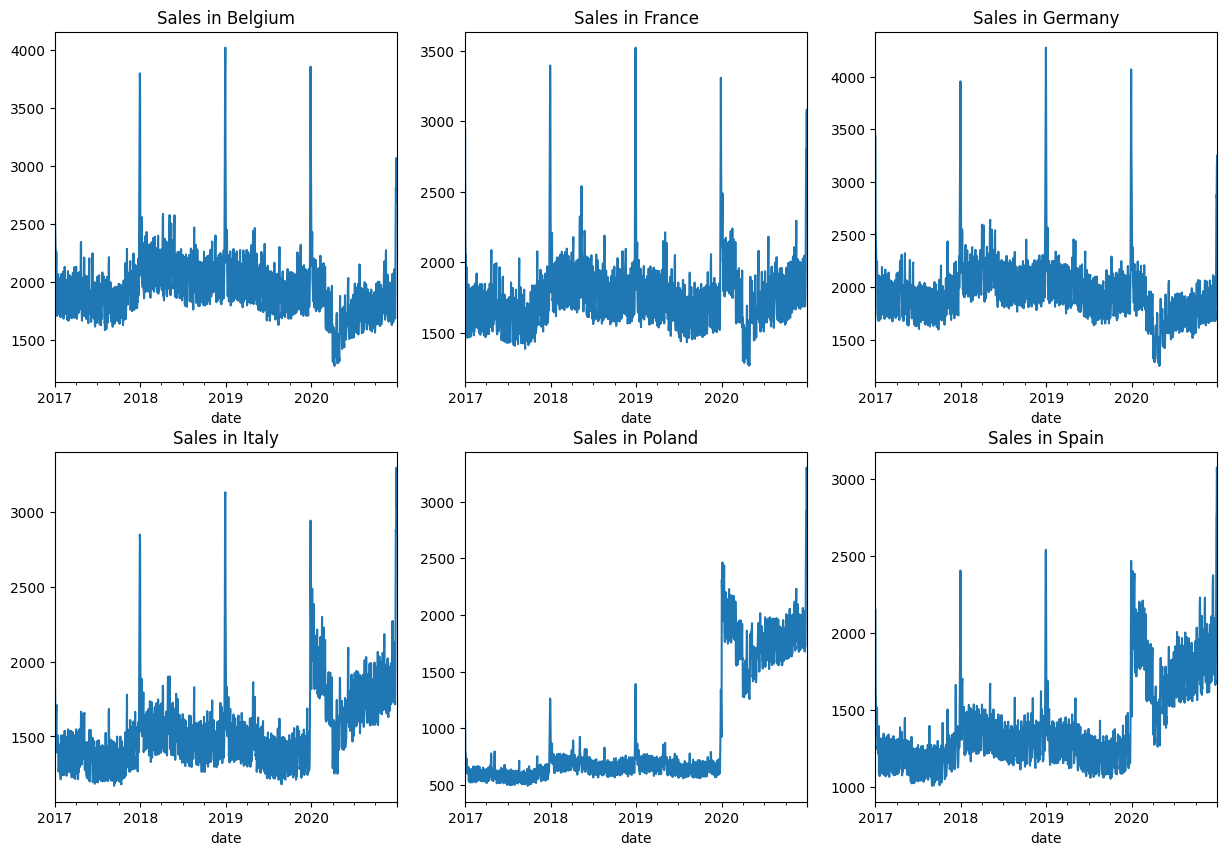

In [167]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes[0][0].set_title('Sales in Belgium')
axes[0][0].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Belgium']['num_sold'].plot(ax=axes[0][0])
axes[0][1].set_title('Sales in France')
axes[0][1].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'France']['num_sold'].plot(ax=axes[0][1])
axes[0][2].set_title('Sales in Germany')
axes[0][2].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Germany']['num_sold'].plot(ax=axes[0][2])
axes[1][0].set_title('Sales in Italy')
axes[1][0].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Italy']['num_sold'].plot(ax=axes[1][0])
axes[1][1].set_title('Sales in Poland')
axes[1][1].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Poland']['num_sold'].plot(ax=axes[1][1])
axes[1][2].set_title('Sales in Spain')
axes[1][2].set_xlabel('dates')
sales_per_country[sales_per_country['country'] == 'Spain']['num_sold'].plot(ax=axes[1][2])

In [168]:
def plot_sales_per_country(df):
    plt.figure(figsize=(16, 8), dpi=150)
    df[df['country'] == 'Belgium']['num_sold'].plot(label='Belgium')
    df[df['country'] == 'France']['num_sold'].plot(label='France')
    df[df['country'] == 'Germany']['num_sold'].plot(label='Germany')
    df[df['country'] == 'Italy']['num_sold'].plot(label='Italy')
    df[df['country'] == 'Poland']['num_sold'].plot(label='Poland')
    df[df['country'] == 'Spain']['num_sold'].plot(label='Spain')
    plt.legend()
    plt.title("Sales per country")
    plt.xlabel("date")
    plt.show()

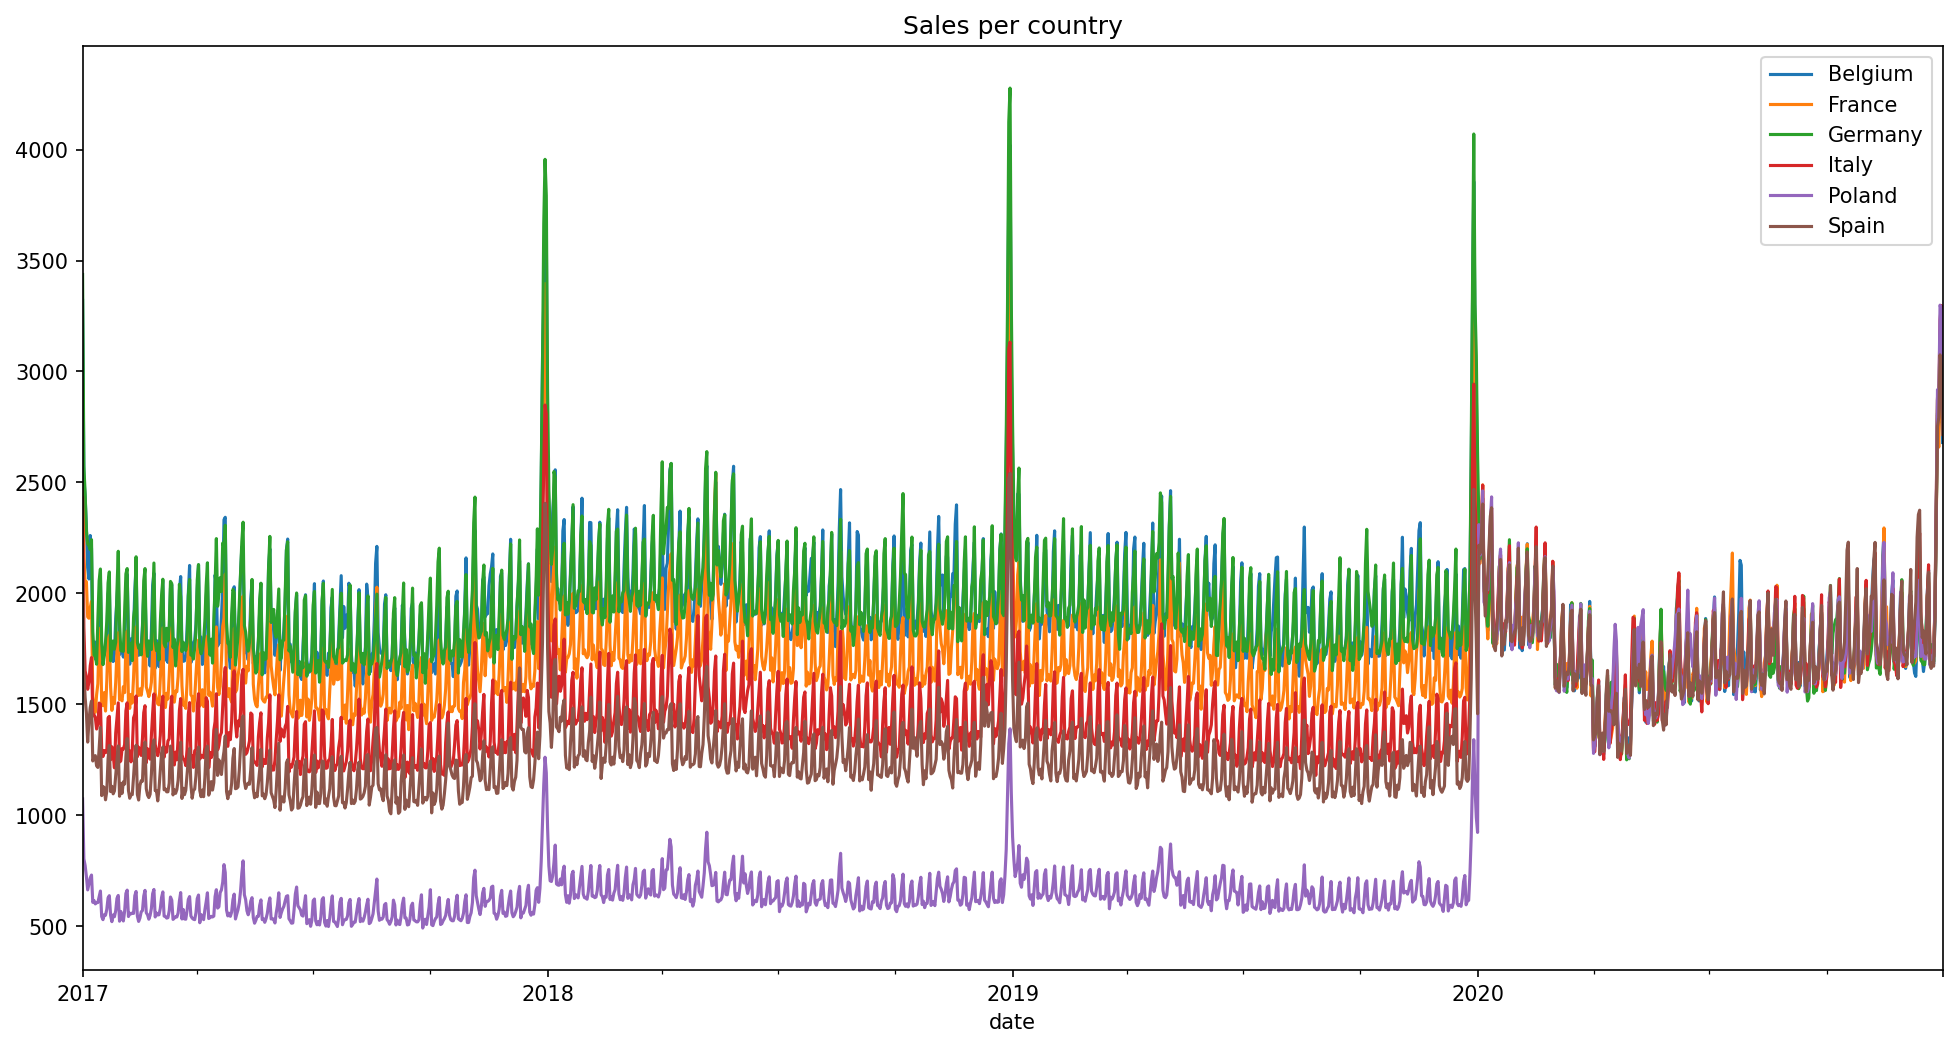

In [169]:
plot_sales_per_country(sales_per_country)

In [173]:
# Inspect one year
sales_per_country = sales_per_country.reset_index()
sales_per_country_2017 = sales_per_country[sales_per_country['date'] < pd.Timestamp("2018-01-01")]
sales_per_country_2017_january = sales_per_country[sales_per_country['date'] < pd.Timestamp("2017-02-01")]
sales_per_country_2017_january.set_index('date', inplace=True)
sales_per_country_2017.set_index('date', inplace=True)

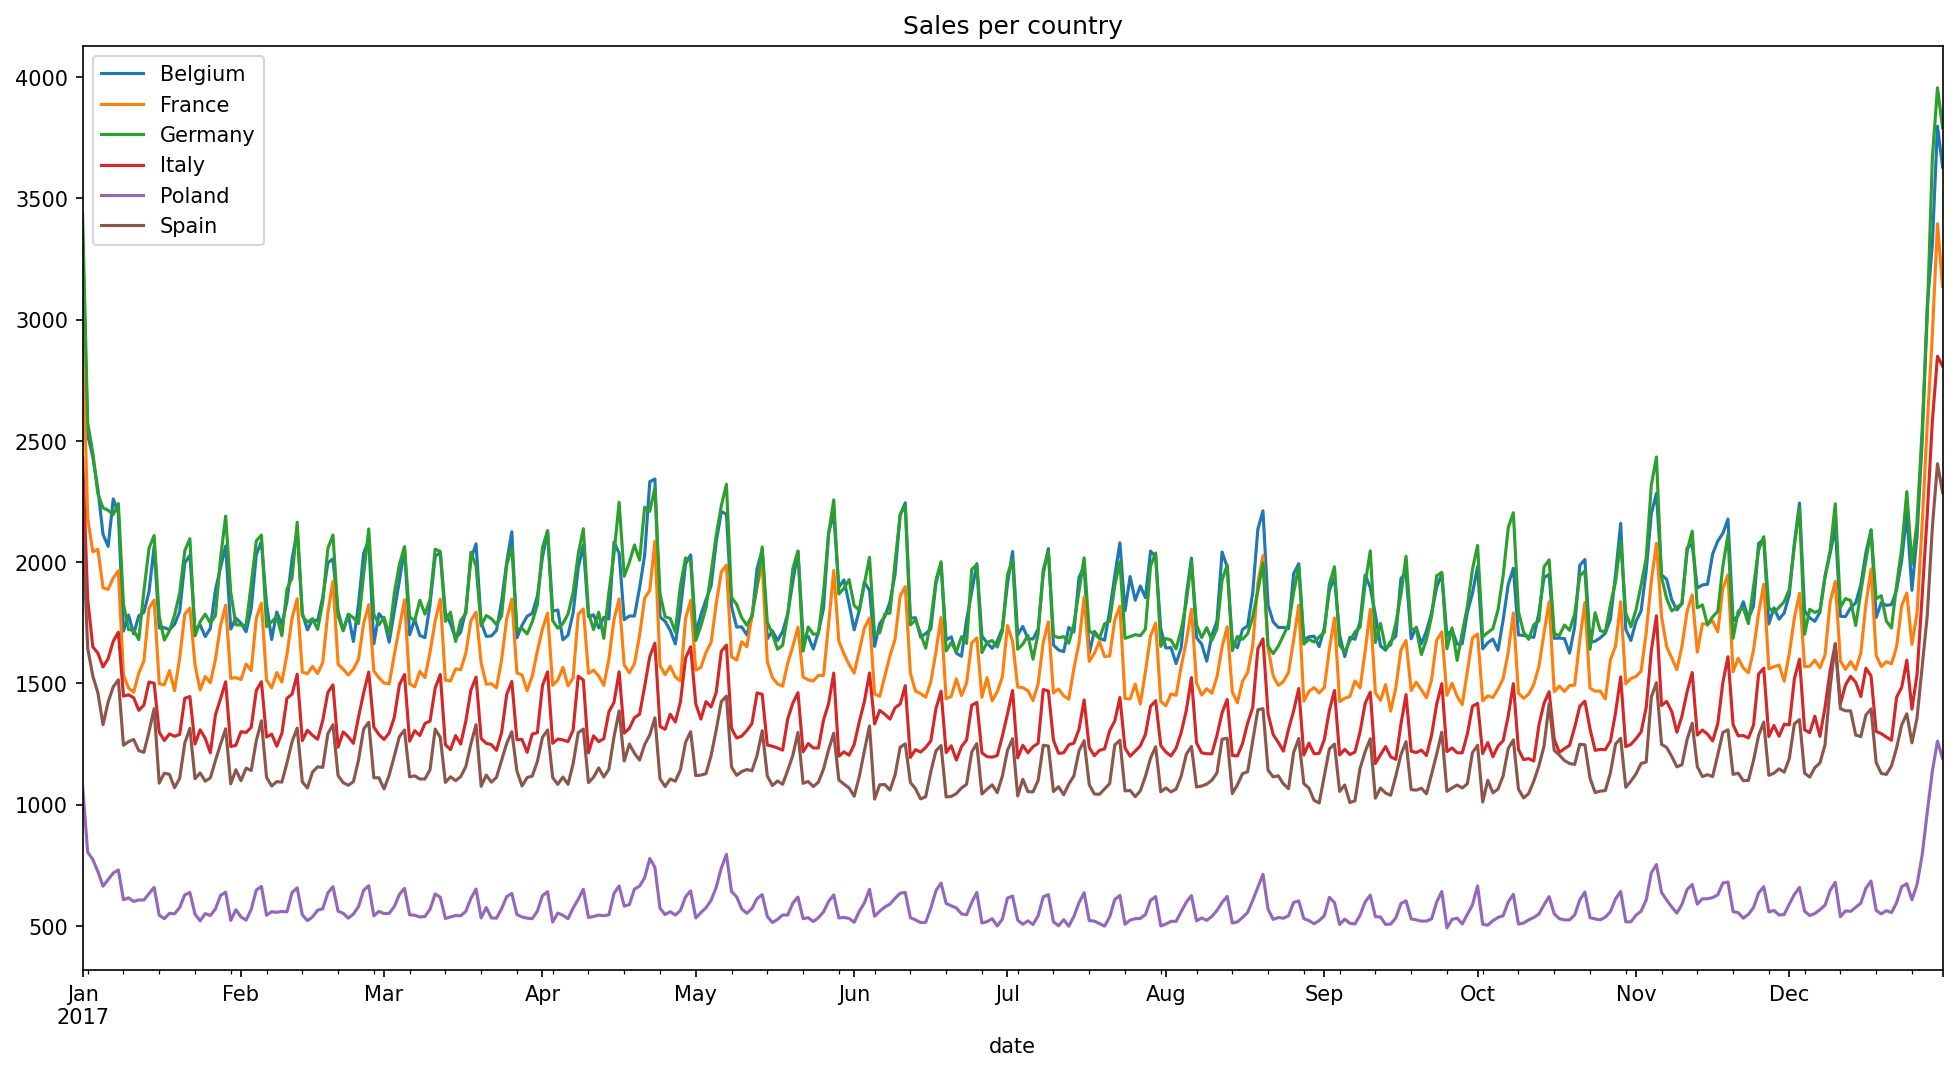

In [174]:
plot_sales_per_country(sales_per_country_2017)

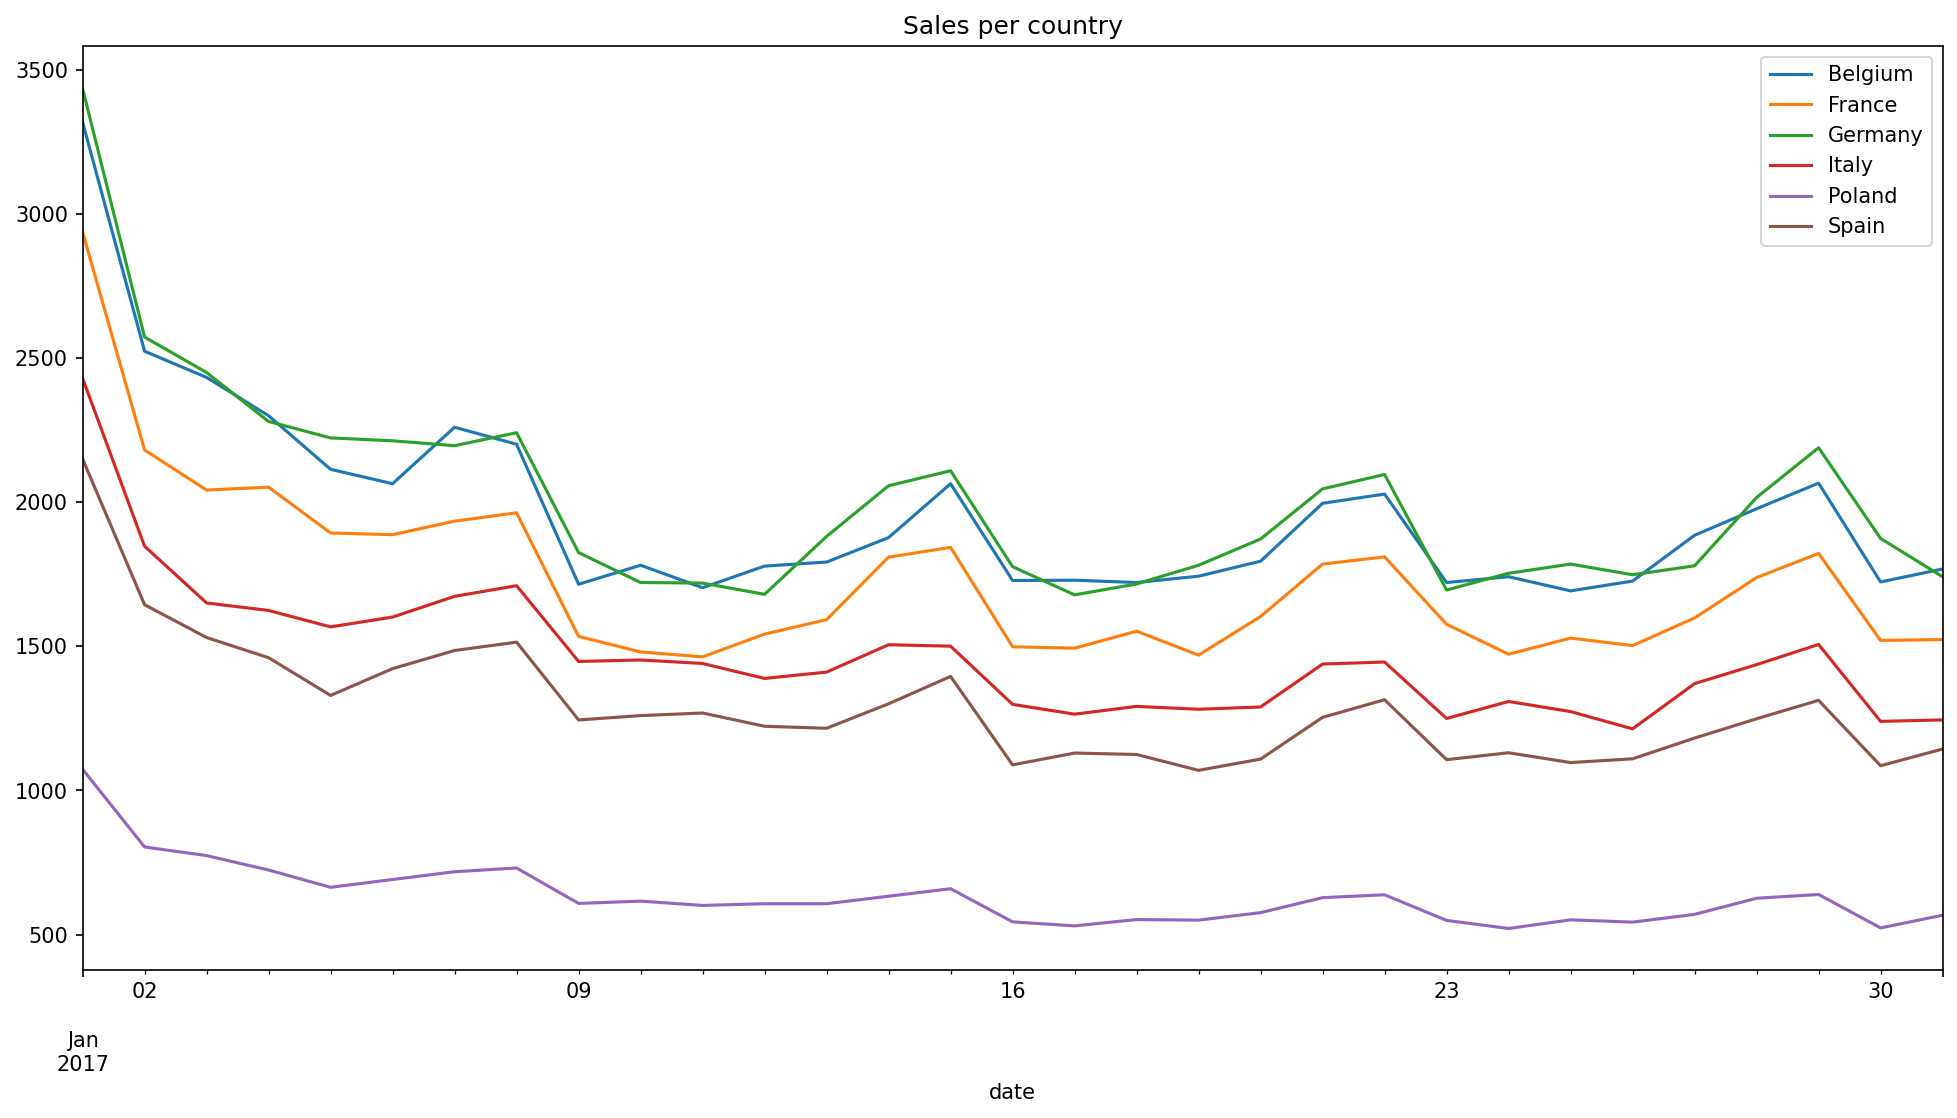

In [175]:
plot_sales_per_country(sales_per_country_2017_january)

##### Autocorrelation

In [219]:
# Autocorrelation over all years but 2020
def calculate_autocorr(df, lag = 1, use_year_2020 = True):
    if not use_year_2020:
        df = df[df['date'] < pd.Timestamp("2020-01-01")]
    for country in df['country'].unique():
        print(f"Autocorrelation for {country} is {df[df['country'] == country]['num_sold'].autocorr(lag=lag)}")

print("With lag = 28 = 4 * 7")
calculate_autocorr(sales_per_country, lag=28)
print("With lag = 30 ≠ n * 7")
calculate_autocorr(sales_per_country, lag=30)

With lag = 28 = 4 * 7
Autocorrelation for Belgium is 0.5523447036965516
Autocorrelation for France is 0.48738224192567675
Autocorrelation for Germany is 0.5244551966224321
Autocorrelation for Italy is 0.6004712242948284
Autocorrelation for Poland is 0.8981090224884413
Autocorrelation for Spain is 0.7595387366004243
With lag = 30 ≠ n * 7
Autocorrelation for Belgium is 0.16109930796206345
Autocorrelation for France is 0.0477606784965263
Autocorrelation for Germany is 0.17681282387338534
Autocorrelation for Italy is 0.32816197188323687
Autocorrelation for Poland is 0.8644708959641013
Autocorrelation for Spain is 0.5820013716483833


<b>❗ Insights</b> :
- Change in data from year 2020 onward: Across all 6 countries the sales are very identical in terms of absolute value and swings.

- Spikes at the end of each year -> Seasonality due to christmas & new year.
- Weekly seasonality -> Expressed by lag = n * 7 in autocorrelation

<b> ❓ Questions </b>:
- Only train on data starting from 2020 onward as the past behaviour is no longer representative.

### b) Sales per store

In [131]:
sales_per_store = train_df.groupby(['date','store']).agg({
    'num_sold': 'sum',
}).reset_index()
sales_per_store = sales_per_store.set_index('date')
sales_per_store.head(10)

,store,num_sold
date,,
2017-01-01,KaggleMart,11314
2017-01-01,KaggleRama,4038
2017-01-02,KaggleMart,8564
2017-01-02,KaggleRama,3014
2017-01-03,KaggleMart,8074
2017-01-03,KaggleRama,2810
2017-01-04,KaggleMart,7736
2017-01-04,KaggleRama,2709
2017-01-05,KaggleMart,7244


In [132]:
def plot_sales_per_store(df):
    plt.figure(figsize=(16, 8), dpi=150)
    df[df['store'] == 'KaggleMart']['num_sold'].plot(label='KaggleMart')
    df[df['store'] == 'KaggleRama']['num_sold'].plot(label='KaggleRama')
    plt.legend()
    plt.title("Sales per store")
    plt.xlabel("date")
    plt.show()

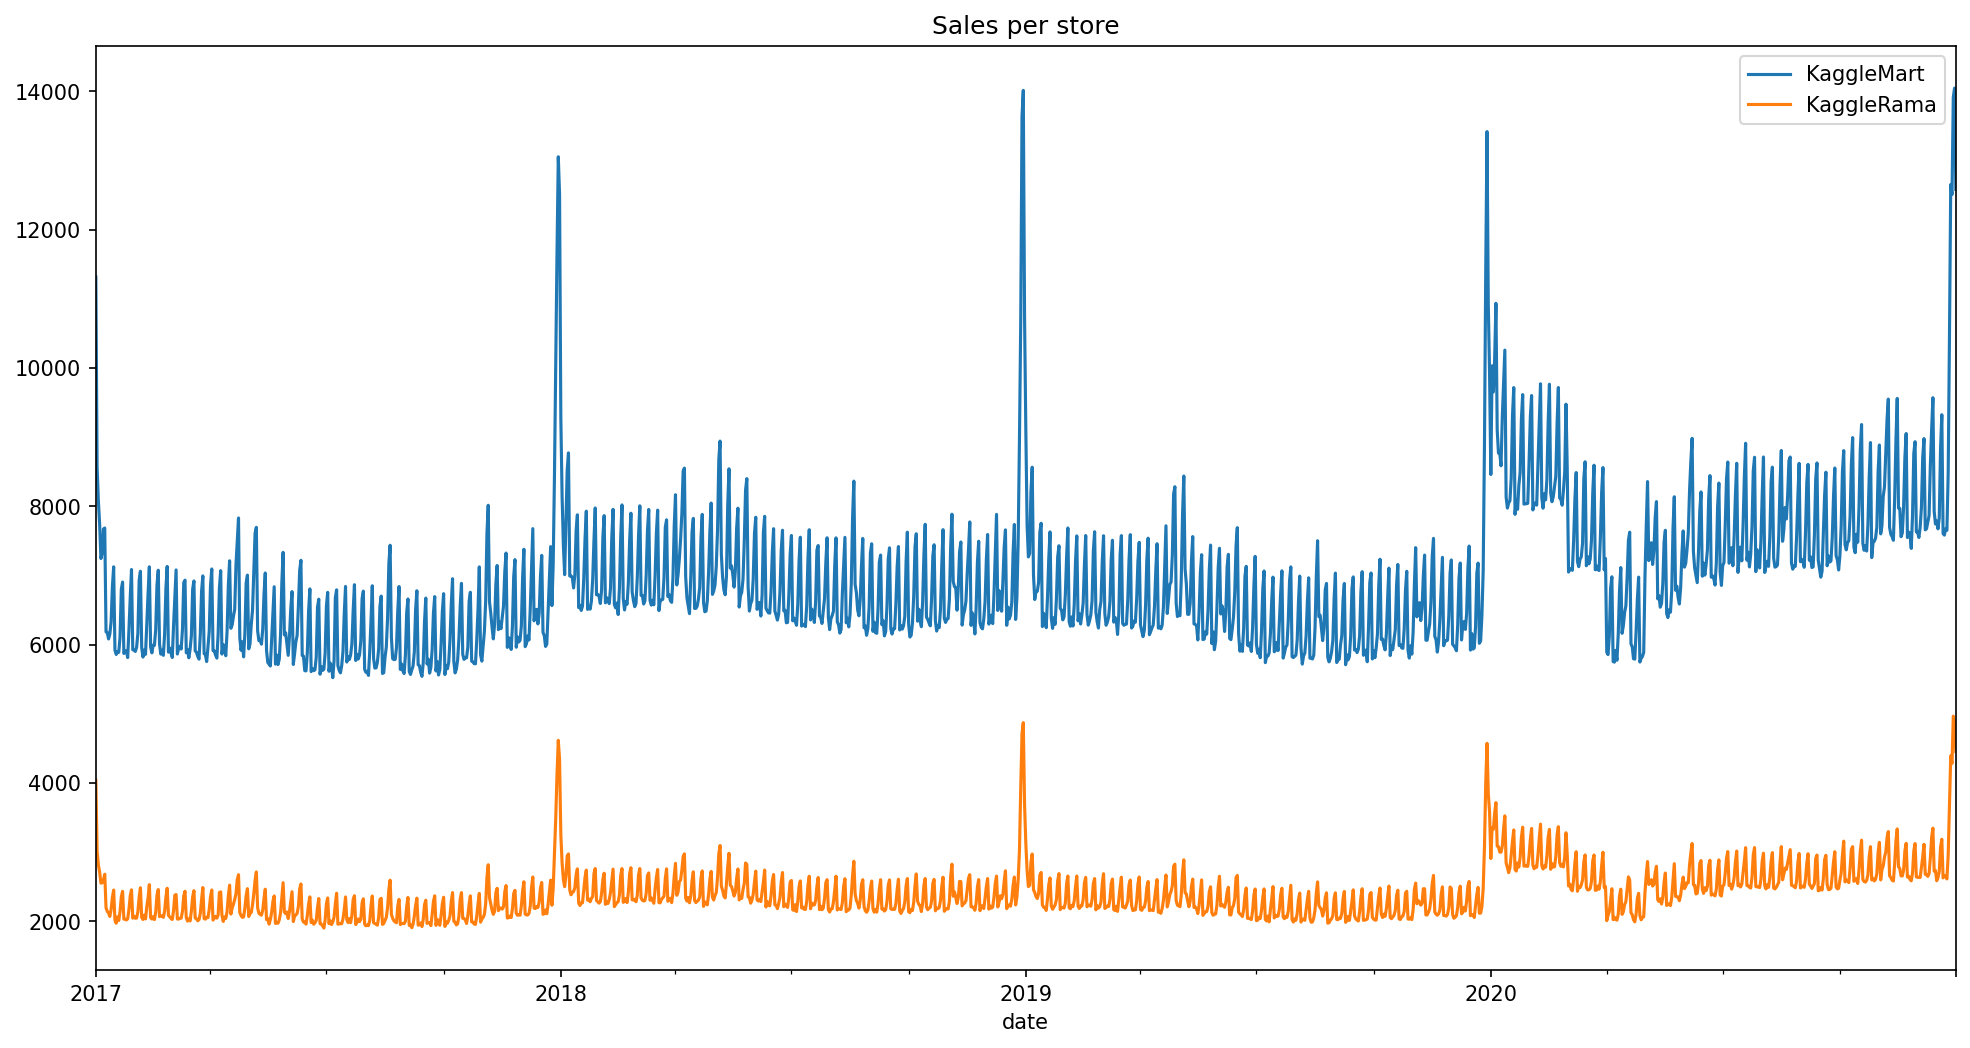

In [133]:
plot_sales_per_store(sales_per_store)

##### Correlation between time series

In [136]:
sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'].corr(sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold'])

0.9950379749563211

In [228]:
mean_div_coeff = (sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'] / sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold']).mean()
std_div_coeff = (sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'] / sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold']).std()
print(f"Mean division coeff = {mean_div_coeff} and std = {std_div_coeff} across time.")

Mean division coeff = 2.8842788732867124 and std = 0.04374457001822051 across time.


Text(0.5, 1.0, 'Deviation from mean division coefficient over 4 years')

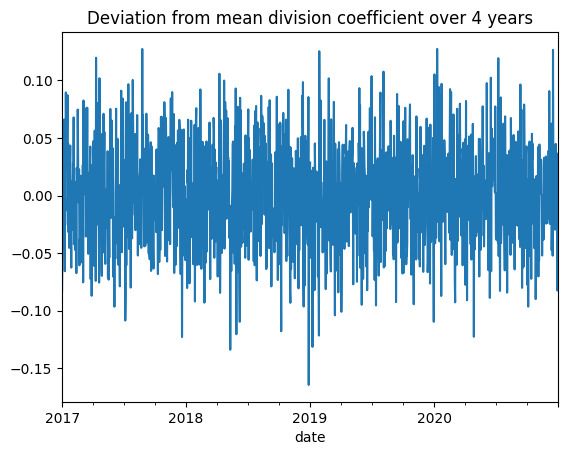

In [236]:
plt = ((sales_per_store[sales_per_store['store'] == 'KaggleMart']['num_sold'] / sales_per_store[sales_per_store['store'] == 'KaggleRama']['num_sold']) - mean_div_coeff).plot()
plt.set_title("Deviation from mean division coefficient over 4 years")

##### Decomposition of sales for one of the two highly correlated book stores.

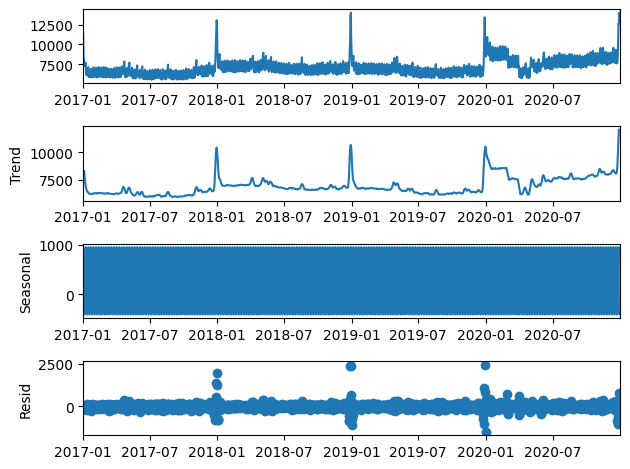

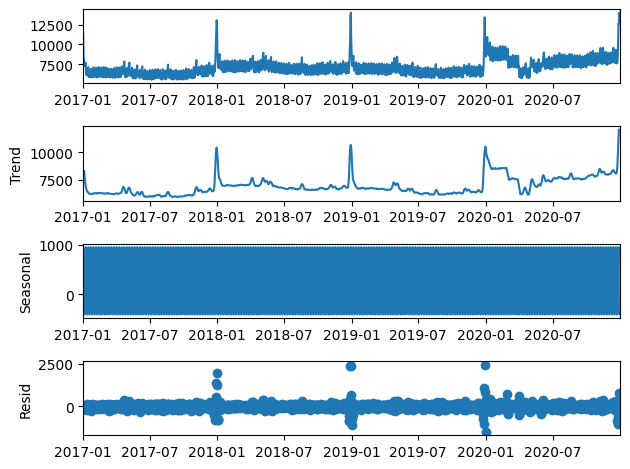

In [222]:
seasonal_decompose(sales_per_store[sales_per_store["store"] == 'KaggleMart'].drop(["store"], axis=1), model="additive").plot()

<b>❗ Insights</b> :
- Change in data from year 2020 onward clearly visible. This is a new trend as can be seen by the decomposition. Also, seasonal fluctuations (weekly and yearly) don't change in 2020. This is clear from the not significantly higher residual values in 2020.
- The two shops are almost perfectly correlated even in 2020. Given one book store we should be able to predict the other one by a simple multiplication and some noise.

<b> ❓ Questions </b>:
- How is the behaviour in each country? Also almost perfectly correlated?
- Is there any benefit to use the additional datapoints for the second book store as the datapoints are basically perfectly correlated across time?

In [ ]:
fig = tsaplots.plot_acf(tps["target_carbon_monoxide"], lags=70)

plt.title("Autocorrelation of Carbon Monoxide")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();